# New Section
personalized E- learning

In [ ]:
!pip install pandas numpy seaborn matplotlib scikit-learn xgboost


In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic engagement data
np.random.seed(42)
engagement_data = {
    'student_id': [f'STU{i:03d}' for i in range(1, 101)],
    'time_spent': np.random.normal(120, 30, 100).clip(20, 300),  # Minutes/day
    'clicks': np.random.poisson(50, 100),  # Clicks/day
    'forum_posts': np.random.randint(0, 10, 100),
    'video_views': np.random.poisson(15, 100)
}
engagement_df = pd.DataFrame(engagement_data)
engagement_df.to_csv('engagement_data.csv', index=False)

In [ ]:
# Generate synthetic performance data
performance_data = {
    'student_id': engagement_df['student_id'],
    'final_grade': np.random.normal(75, 15, 100).clip(40, 100),  # Score out of 100
    'passed': (np.random.normal(0.7, 0.2, 100) > 0.5).astype(int),  # Binary (1=Pass, 0=Fail)
    'quizzes_completed': np.random.randint(5, 20, 100)
}
performance_df = pd.DataFrame(performance_data)
performance_df.to_csv('performance_data.csv', index=False)

In [ ]:
import pandas as pd

# Load data
engagement = pd.read_csv('engagement_data.csv')
performance = pd.read_csv('performance_data.csv')

# Merge on student_id
df = pd.merge(engagement, performance, on='student_id', how='inner')
print(f"Merged Data Shape: {df.shape}\n")
print(df.head(3))

Merged Data Shape: (100, 8)

  student_id  time_spent  clicks  forum_posts  video_views  final_grade  \
0     STU001  134.901425      48            0           13    62.093800   
1     STU002  115.852071      40            7           13    69.231667   
2     STU003  139.430656      65            9           18    90.094392   

   passed  quizzes_completed  
0       1                 11  
1       1                  9  
2       0                 14  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Fill missing values (if any)
df.fillna(0, inplace=True)

# Normalize features
scaler = StandardScaler()
df[['time_spent', 'clicks']] = scaler.fit_transform(df[['time_spent', 'clicks']])

# Create engagement score
df['engagement_score'] = 0.6 * df['time_spent'] + 0.4 * df['clicks']
print("\nEngagement Score Sample:")
print(df[['student_id', 'engagement_score']].head(3))


Engagement Score Sample:
  student_id  engagement_score
0     STU001          0.275305
1     STU002         -0.570241
2     STU003          1.276383


Data Types:
 student_id            object
time_spent           float64
clicks               float64
forum_posts            int64
video_views            int64
final_grade          float64
passed                 int64
quizzes_completed      int64
engagement_score     float64
dtype: object


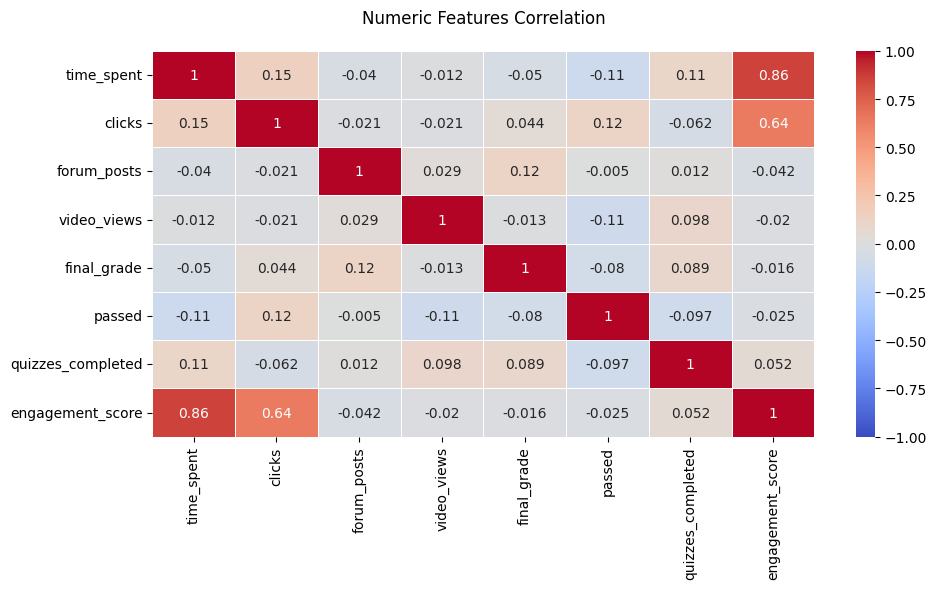

In [ ]:
# After merging and preprocessing...
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Verify column types
print("Data Types:\n", df.dtypes)

# 2. Correlation heatmap (numeric only)
numeric_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_cols.corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Numeric Features Correlation", pad=20)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Prepare data
X = df[['engagement_score', 'time_spent', 'clicks']]
y = df['passed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.88      0.82      0.85        17

    accuracy                           0.75        20
   macro avg       0.56      0.58      0.57        20
weighted avg       0.78      0.75      0.76        20



In [ ]:
def personalize_learning(student):
    if student['engagement_score'] < -0.5:
        return "High Risk: Send motivational emails + 1:1 tutor session"
    elif student['engagement_score'] > 0.5:
        return "High Performer: Assign advanced projects"
    else:
        return "Medium: Weekly check-ins + extra practice"

df['personalized_plan'] = df.apply(personalize_learning, axis=1)
print("\nPersonalized Plans Sample:")
print(df[['student_id', 'engagement_score', 'personalized_plan']].head(5))


Personalized Plans Sample:
  student_id  engagement_score  \
0     STU001          0.275305   
1     STU002         -0.570241   
2     STU003          1.276383   
3     STU004          1.062757   
4     STU005          0.902801   

                                   personalized_plan  
0          Medium: Weekly check-ins + extra practice  
1  High Risk: Send motivational emails + 1:1 tuto...  
2           High Performer: Assign advanced projects  
3           High Performer: Assign advanced projects  
4           High Performer: Assign advanced projects  


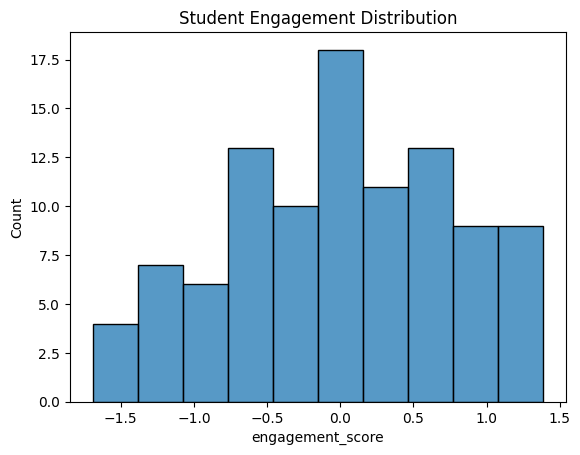

In [ ]:
# Save recommendations
df[['student_id', 'engagement_score', 'final_grade', 'personalized_plan']].to_csv('recommendations.csv', index=False)

# Visualize engagement distribution
sns.histplot(df['engagement_score'], bins=10)
plt.title("Student Engagement Distribution")
plt.show()